# 2.1.6 Эффект Джоуля-Томсона

## 10. Коэффиценты Дж-Томсона для трёх температур

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MUs = []   # Коэфф. Дж-Томсона для различных температур
MUs_s = [] # Погрешности этих коэффицентов

In [3]:
def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

### T = 20, 30, 37

При 20 градусах коэфф. равен: 1.313252282167105 +- 0.005694434082853068
Параметр b прямой МНК: -0.8309216888225945
При 30 градусах коэфф. равен: 1.202477727336406 +- 0.011704637619573093
Параметр b прямой МНК: -0.7181429539628894
При 37 градусах коэфф. равен: 1.2204264566073493 +- 0.025397256553104142
Параметр b прямой МНК: -0.9222273529810803


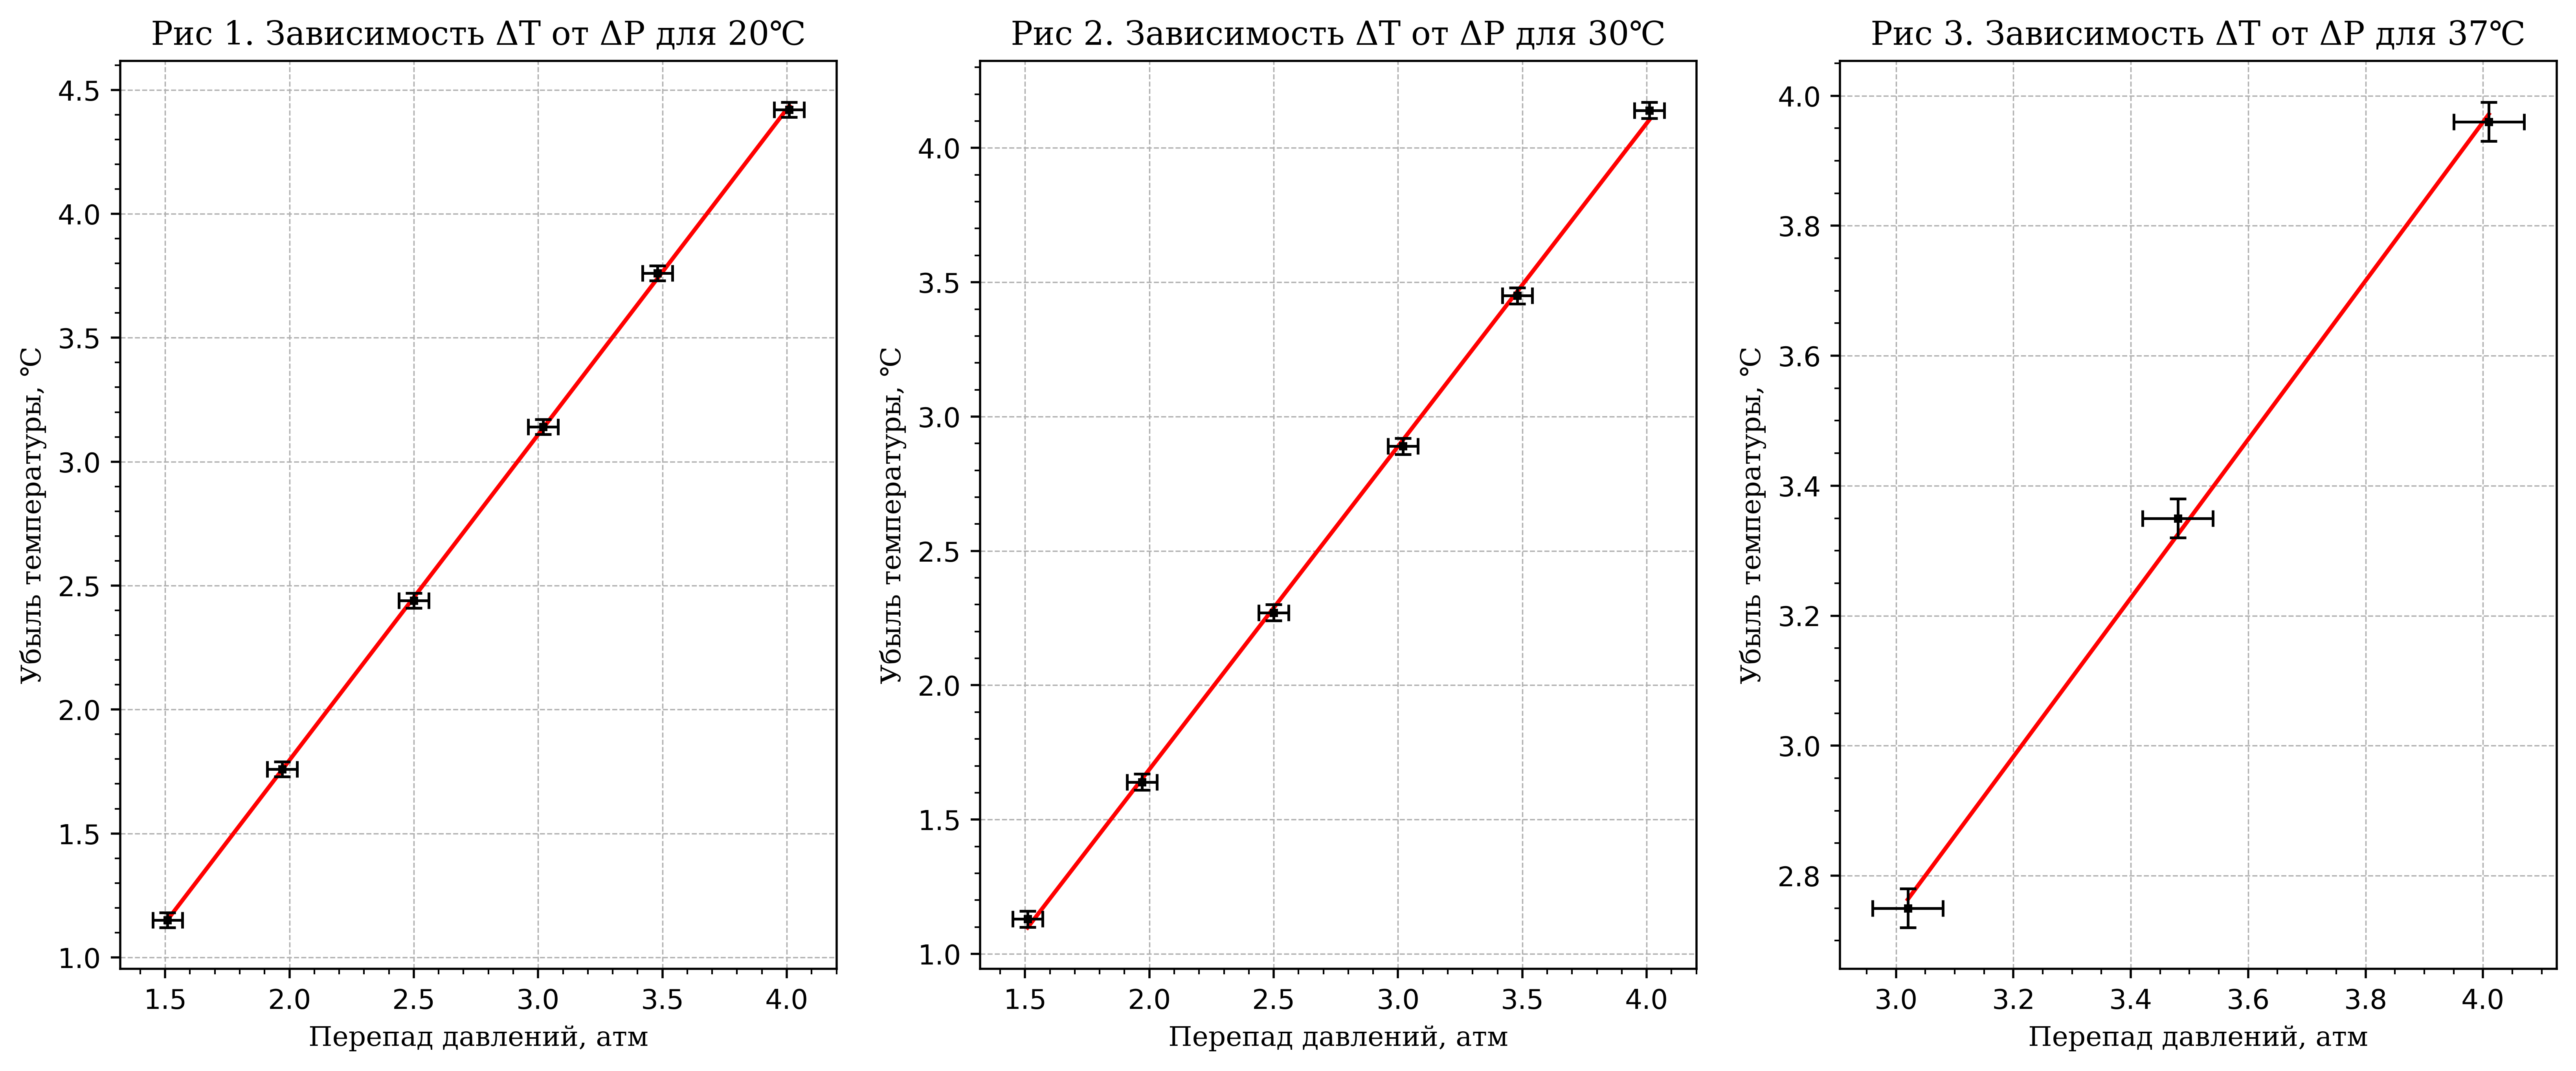

In [4]:
fig, (ax_20, ax_30, ax_37) = plt.subplots(dpi=500, figsize=(16,6), ncols=3)
#################### 20
####################
dT = np.array( [4.42, 3.76, 3.14, 2.44, 1.76, 1.15] )
# dT = np.array( [4.27, 3.56, 2.94, 2.3, 1.62, 1.01] )
dP = np.array( [4.01, 3.48, 3.02, 2.5, 1.97, 1.51] )

ax_20.minorticks_on()
ax_20.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',
font = {'fontname': 'DejaVu Serif'}
ax_20.set_xlabel('Перепад давлений, атм', **font)
ax_20.set_ylabel('Убыль температуры, ℃', **font)
ax_20.set_title('Рис 1. Зависимость ΔT от ΔP для 20℃', wrap=True, **font)
ax_20.errorbar(dP, dT, fmt='ks', linewidth=0, markersize=2, elinewidth=1, 
    xerr=0.06, yerr=0.03,
    capsize=3, zorder=3
)

(mu, s_mu, b, s_b) = lin_ls(dP, dT, through_null=False)
ax_20.plot(dP, dP * mu + b, color='r')
print(f'При 20 градусах коэфф. равен: {mu} +- {s_mu}')
print(f'Параметр b прямой МНК: {b}')
MUs.append(mu)
MUs_s.append(s_mu)
################### 30
###################
dT = np.array( [4.14, 3.45, 2.89, 2.27, 1.64, 1.13] )
dP = np.array( [4.01, 3.48, 3.02, 2.5, 1.97, 1.51] )

ax_30.minorticks_on()
ax_30.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',
font = {'fontname': 'DejaVu Serif'}
ax_30.set_xlabel('Перепад давлений, атм', **font)
ax_30.set_ylabel('Убыль температуры, ℃', **font)
ax_30.set_title('Рис 2. Зависимость ΔT от ΔP для 30℃', wrap=True, **font)
ax_30.errorbar(dP, dT, fmt='ks', linewidth=0, markersize=2, elinewidth=1, 
    xerr=0.06, yerr=0.03,
    capsize=3, zorder=3
)

(mu, s_mu, b, s_b) = lin_ls(dP, dT, through_null=False)
ax_30.plot(dP, dP * mu + b, color='r')
print(f'При 30 градусах коэфф. равен: {mu} +- {s_mu}')
print(f'Параметр b прямой МНК: {b}')
MUs.append(mu)
MUs_s.append(s_mu)
################## 37
##################
dT = np.array( [3.96, 3.35, 2.75] )
dP = np.array( [4.01, 3.48, 3.02] )

ax_37.minorticks_on()
ax_37.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',
font = {'fontname': 'DejaVu Serif'}
ax_37.set_xlabel('Перепад давлений, атм', **font)
ax_37.set_ylabel('Убыль температуры, ℃', **font)
ax_37.set_title('Рис 3. Зависимость ΔT от ΔP для 37℃', wrap=True, **font)
ax_37.errorbar(dP, dT, fmt='ks', linewidth=0, markersize=2, elinewidth=1, 
    xerr=0.06, yerr=0.03,
    capsize=3, zorder=3
)

(mu, s_mu, b, s_b) = lin_ls(dP, dT, through_null=False)
ax_37.plot(dP, dP * mu + b, color='r')
print(f'При 37 градусах коэфф. равен: {mu} +- {s_mu}')
print(f'Параметр b прямой МНК: {b}')
MUs.append(mu)
MUs_s.append(s_mu)
MUs = np.array(MUs)

## 11. График коэфф. Дж-Томсона от 1/T

[1.31325228 1.20247773 1.22042646]
Коэффиценты прямой: k = 984.4359940943973, b = -2.0448783475255423


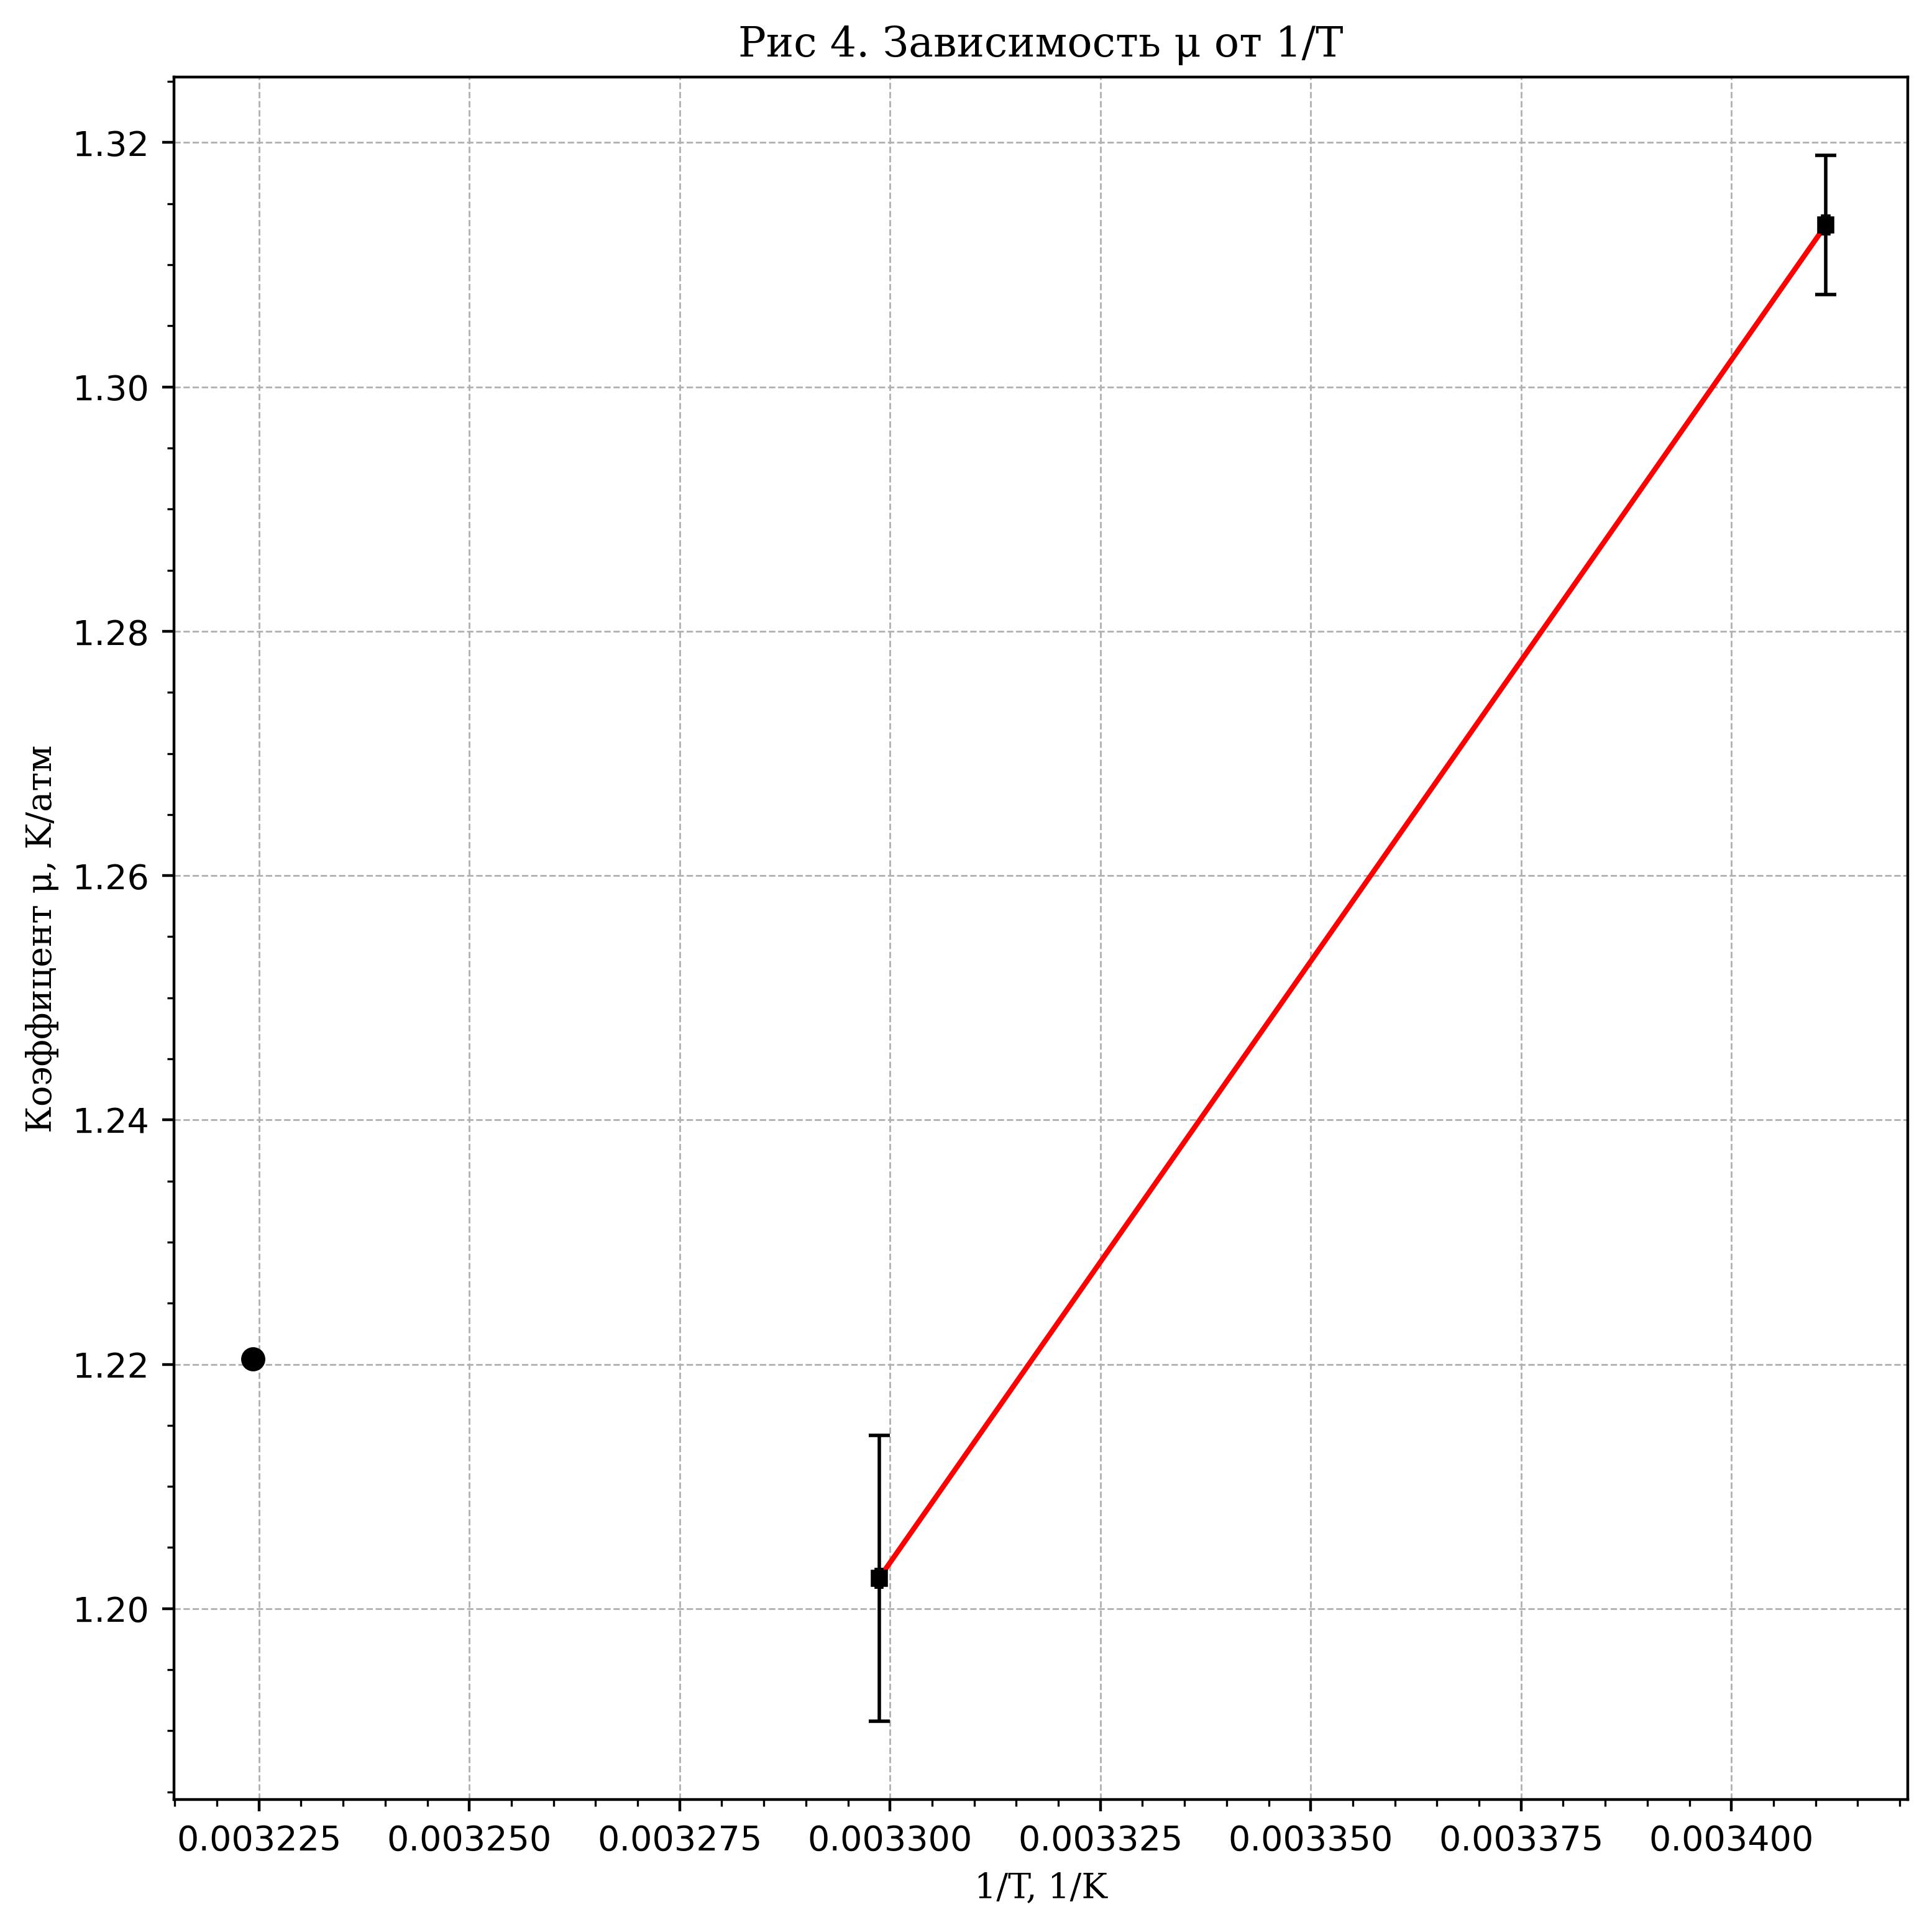

In [5]:
fig, ax = plt.subplots(figsize=(9,9), dpi=400)
print(MUs)
Ts = np.array( [20, 30, 37] ) + 273.15
ax.minorticks_on()
ax.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',
font = {'fontname': 'DejaVu Serif'}
ax.set_xlabel('1/T, 1/K', **font)
ax.set_ylabel('Коэффицент μ, K/атм', **font)
ax.set_title('Рис 4. Зависимость μ от 1/T', wrap=True, **font)

ax.scatter(1/Ts[2], MUs[2], zorder=2, c='k')
ax.errorbar(1/Ts[:2], MUs[:2], fmt='ks', linewidth=0, markersize=4, elinewidth=1, 
    xerr=[0.03 / ((20+273.15)**2), 0.03 / ((30+273.15)**2)], yerr=MUs_s[:2],
    capsize=3, zorder=3
)


k = ( MUs[0] - MUs[1] ) / ( (1 / Ts[0]) - (1 / Ts[1]) )
b = MUs[0] - (MUs[0] - MUs[1]) / (1 - Ts[0]/Ts[1])
print(f'Коэффиценты прямой: k = {k}, b = {b}')
ax.plot(1/Ts[:2], k * 1/Ts[:2] + b, c='r')